In [1]:
import episcanpy.api as epi
import anndata as ad
import scanpy as sc
import pandas as pd
import copy

/home/icb/anna.danese/.local/lib/python3.7/site-packages/scanpy/api/__init__.py:6: FutureWarning: 

In a future version of Scanpy, `scanpy.api` will be removed.
Simply use `import scanpy as sc` and `import scanpy.external as sce` instead.

  FutureWarning


In [74]:
# Load the 10x dataset
adata10x = ad.read('10x_5kb_windows_top150000_not_normalised.h5ad')

In [83]:
adata10x.raw.X.shape

(3406, 462048)

In [6]:
adata_merge_Fang = ad.read('Fang_5kb_windows_top150000_not_normalised.h5ad')
adata_merge_Fang.raw

The 3 different datasets were processed previously.
Low quality cells, contaminating cells were removed. The windows were filtered to retain the top 150000 most variable windows within the dataset. 

# Merging 10x and Fang datasets

In [7]:
# Load the 10x dataset
adata10x = ad.read('10x_5kb_windows_top150000_not_normalised.h5ad')
# Load the Fang dataset
adata_merge_Fang = ad.read('Fang_5kb_windows_top150000_not_normalised.h5ad')

# merge the 2 datasets
adata_merged = adata10x.concatenate(adata_merge_Fang)
# remove the 2 original datasets after merging them
del adata10x, adata_merge_Fang

# add batchname
batchname=copy.copy(adata_merged.obs['batch'])
adata_merged.obs['batchname'] = batchname.map({ '1' : 'Fang et al. 2019', '0' : '10x Genomics' })

adata_merged

AnnData object with n_obs × n_vars = 73708 × 128963 
    obs: '10x_cell_label', 'Fang_cell_type', 'batch', 'batchname', 'batchname_Fang', 'nb_features'
    var: 'n_cells-0', 'commonness-0', 'prop_shared_cells-0', 'variability_score-0', 'n_cells-1', 'commonness-1', 'prop_shared_cells-1', 'variability_score-1'

In [8]:
adata_merged.raw

In [49]:
contingency_table_prefilt = pd.crosstab(adata_merged.obs['batchname'],
                                adata_merged.obs['batchname'],
                                margins = True)
contingency_table_prefilt

batchname,10x Genomics,Fang et al. 2019,All
batchname,,,
10x Genomics,3406,0,3406
Fang et al. 2019,0,70302,70302
All,3406,70302,73708


batchname,10x Genomics,Fang et al. 2019,All
batchname,,,
10x Genomics,3406,0,3406
Fang et al. 2019,0,70302,70302
All,3406,70302,73708


In [50]:
adata_merged

AnnData object with n_obs × n_vars = 73708 × 128963 
    obs: '10x_cell_label', 'Fang_cell_type', 'batch', 'batchname', 'batchname_Fang', 'nb_features'
    var: 'n_cells-0', 'commonness-0', 'prop_shared_cells-0', 'variability_score-0', 'n_cells-1', 'commonness-1', 'prop_shared_cells-1', 'variability_score-1'

AnnData object with n_obs × n_vars = 73708 × 128963 
    obs: '10x_cell_label', 'Fang_cell_type', 'batch', 'batchname', 'batchname_Fang', 'nb_features'
    var: 'n_cells-0', 'commonness-0', 'prop_shared_cells-0', 'variability_score-0', 'n_cells-1', 'commonness-1', 'prop_shared_cells-1', 'variability_score-1'

In [51]:
# save intermediary file
adata_merged.write('10x_Fang_150000_not_normalised.h5ad')

... storing '10x_cell_label' as categorical
... storing '10x_cell_label' as categorical
... storing 'Fang_cell_type' as categorical
... storing 'Fang_cell_type' as categorical
... storing 'batchname_Fang' as categorical
... storing 'batchname_Fang' as categorical


# add the Cusanovich dataset
Cusanovich et al. 2018 (GEO number GSE111586)

In [52]:
# Load the Cusanovich dataset
adata_Cus = ad.read('Cus_brain_5kb_windows_top150000_not_normalised.h5ad')
# merge Cusanovich to 10x+Fang
adata_merged = adata_merged.concatenate(adata_Cus)
# delete the Cusanovich after merging
del adata_Cus

# add batchname for Cusanovich (GSE111586)
annot = []
for n in adata_merged.obs['batchname']:
    if type(n) != str:
        annot.append('Cusanovich et al. 2018')
    else:
        annot.append(n)
adata_merged.obs['batchname'] = annot
adata_merged

AnnData object with n_obs × n_vars = 87221 × 57447 
    obs: '10x_cell_label', 'Cus_cell_label', 'Fang_cell_type', 'batch', 'batchname', 'batchname_Fang', 'cell_type', 'nb_features', 'tissue'
    var: 'n_cells-0-0', 'commonness-0-0', 'prop_shared_cells-0-0', 'variability_score-0-0', 'n_cells-1-0', 'commonness-1-0', 'prop_shared_cells-1-0', 'variability_score-1-0', 'keep-1', 'n_cells-1', 'commonness-1', 'prop_shared_cells-1', 'variability_score-1'

AnnData object with n_obs × n_vars = 87221 × 57447 
    obs: '10x_cell_label', 'Cus_cell_label', 'Fang_cell_type', 'batch', 'batchname', 'batchname_Fang', 'cell_type', 'nb_features', 'tissue'
    var: 'n_cells-0-0', 'commonness-0-0', 'prop_shared_cells-0-0', 'variability_score-0-0', 'n_cells-1-0', 'commonness-1-0', 'prop_shared_cells-1-0', 'variability_score-1-0', 'keep-1', 'n_cells-1', 'commonness-1', 'prop_shared_cells-1', 'variability_score-1'

In [53]:
contingency_table_prefilt = pd.crosstab(adata_merged.obs['batchname'],
                                adata_merged.obs['batchname'],
                                margins = True)
contingency_table_prefilt

batchname,10x Genomics,Cusanovich et al. 2018,Fang et al. 2019,All
batchname,,,,
10x Genomics,3406,0,0,3406
Cusanovich et al. 2018,0,13513,0,13513
Fang et al. 2019,0,0,70302,70302
All,3406,13513,70302,87221


batchname,10x Genomics,Cusanovich et al. 2018,Fang et al. 2019,All
batchname,,,,
10x Genomics,3406,0,0,3406
Cusanovich et al. 2018,0,13513,0,13513
Fang et al. 2019,0,0,70302,70302
All,3406,13513,70302,87221


In [54]:
# save intermediary file
adata_merged.write('Large_10x_Fang_Cus_150000_not_normalised.h5ad')

... storing '10x_cell_label' as categorical
... storing '10x_cell_label' as categorical
... storing 'Cus_cell_label' as categorical
... storing 'Cus_cell_label' as categorical
... storing 'Fang_cell_type' as categorical
... storing 'Fang_cell_type' as categorical
... storing 'batchname' as categorical
... storing 'batchname' as categorical
... storing 'batchname_Fang' as categorical
... storing 'batchname_Fang' as categorical
... storing 'cell_type' as categorical
... storing 'cell_type' as categorical
... storing 'tissue' as categorical
... storing 'tissue' as categorical
... storing 'keep-1' as categorical
... storing 'keep-1' as categorical


## Add cell type information

In [55]:
adata_merged = ad.read('Large_10x_Fang_Cus_150000_not_normalised.h5ad')
adata_merged

AnnData object with n_obs × n_vars = 87221 × 57447 
    obs: '10x_cell_label', 'Cus_cell_label', 'Fang_cell_type', 'batch', 'batchname', 'batchname_Fang', 'cell_type', 'nb_features', 'tissue'
    var: 'n_cells-0-0', 'commonness-0-0', 'prop_shared_cells-0-0', 'variability_score-0-0', 'n_cells-1-0', 'commonness-1-0', 'prop_shared_cells-1-0', 'variability_score-1-0', 'keep-1', 'n_cells-1', 'commonness-1', 'prop_shared_cells-1', 'variability_score-1'

AnnData object with n_obs × n_vars = 87221 × 57447 
    obs: '10x_cell_label', 'Cus_cell_label', 'Fang_cell_type', 'batch', 'batchname', 'batchname_Fang', 'cell_type', 'nb_features', 'tissue'
    var: 'n_cells-0-0', 'commonness-0-0', 'prop_shared_cells-0-0', 'variability_score-0-0', 'n_cells-1-0', 'commonness-1-0', 'prop_shared_cells-1-0', 'variability_score-1-0', 'keep-1', 'n_cells-1', 'commonness-1', 'prop_shared_cells-1', 'variability_score-1'

In [56]:
set(adata_merged.obs['batchname'])

{'10x Genomics', 'Cusanovich et al. 2018', 'Fang et al. 2019'}

{'10x Genomics', 'Cusanovich et al. 2018', 'Fang et al. 2019'}

In [57]:
index = 0
annot = []
for line in adata_merged.obs['batchname']:
    if line == '10x Genomics':
        annot.append(adata_merged.obs['10x_cell_label'][index])
    elif line == 'Cusanovich et al. 2018':
        annot.append(adata_merged.obs['Cus_cell_label'][index])
    elif line == 'Fang et al. 2019':
        annot.append(adata_merged.obs['Fang_cell_type'][index])
    index += 1
    
adata_merged.obs['final_cell_label'] = annot

In [58]:
adata_merged

AnnData object with n_obs × n_vars = 87221 × 57447 
    obs: '10x_cell_label', 'Cus_cell_label', 'Fang_cell_type', 'batch', 'batchname', 'batchname_Fang', 'cell_type', 'nb_features', 'tissue', 'final_cell_label'
    var: 'n_cells-0-0', 'commonness-0-0', 'prop_shared_cells-0-0', 'variability_score-0-0', 'n_cells-1-0', 'commonness-1-0', 'prop_shared_cells-1-0', 'variability_score-1-0', 'keep-1', 'n_cells-1', 'commonness-1', 'prop_shared_cells-1', 'variability_score-1'

AnnData object with n_obs × n_vars = 87221 × 57447 
    obs: '10x_cell_label', 'Cus_cell_label', 'Fang_cell_type', 'batch', 'batchname', 'batchname_Fang', 'cell_type', 'nb_features', 'tissue', 'final_cell_label'
    var: 'n_cells-0-0', 'commonness-0-0', 'prop_shared_cells-0-0', 'variability_score-0-0', 'n_cells-1-0', 'commonness-1-0', 'prop_shared_cells-1-0', 'variability_score-1-0', 'keep-1', 'n_cells-1', 'commonness-1', 'prop_shared_cells-1', 'variability_score-1'

## Final filtering
To remove cells that do not contain enough covered windows once the 3 datasets are merged. 

In [59]:
sc.settings.set_figure_params(dpi=80, dpi_save=400)

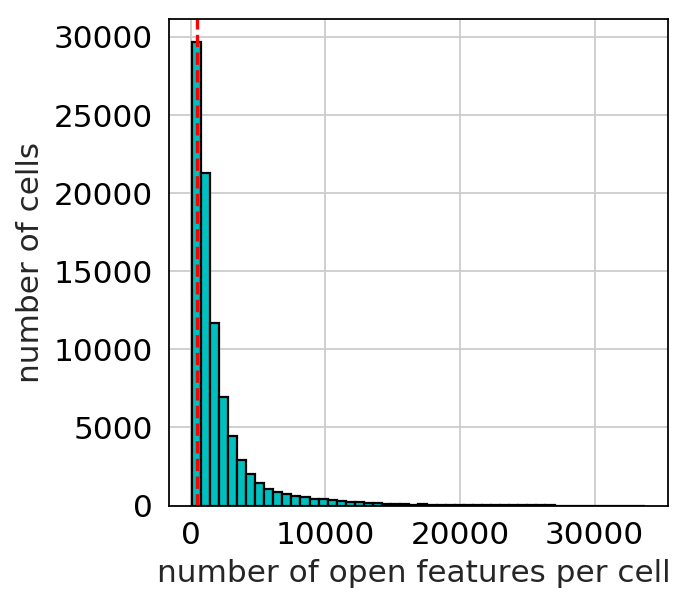

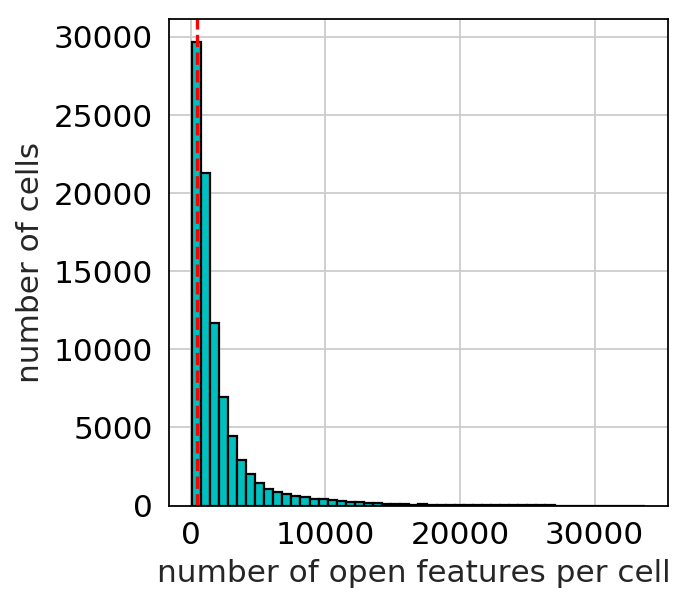

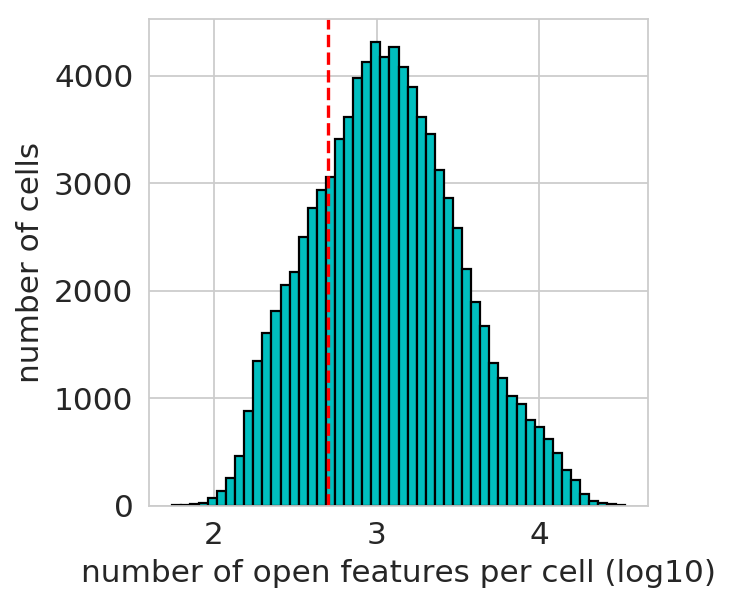

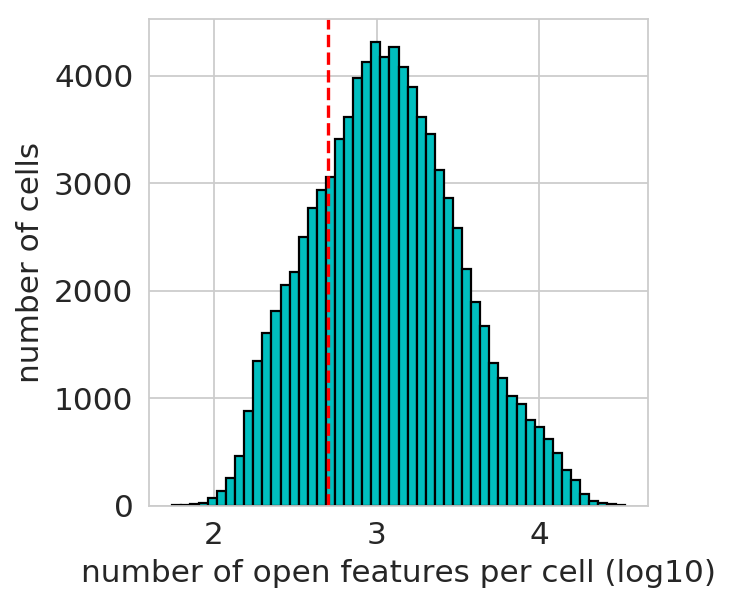

In [60]:
# set a minimum number of cells to keep 
min_features = 500
epi.pp.coverage_cells(adata_merged, binary=True, log=False, bins=50,
               threshold=min_features, save='Cus_Fang_10x_brain_coverage_cells.png')
epi.pp.coverage_cells(adata_merged, binary=True, log=10, bins=50,
               threshold=min_features, save='Cus_Fang_10x_brain_coverage_cells.png')

In [61]:
epi.pp.filter_cells(adata_merged, min_features=500)

In [62]:
adata_merged

AnnData object with n_obs × n_vars = 67612 × 57447 
    obs: '10x_cell_label', 'Cus_cell_label', 'Fang_cell_type', 'batch', 'batchname', 'batchname_Fang', 'cell_type', 'nb_features', 'tissue', 'final_cell_label'
    var: 'n_cells-0-0', 'commonness-0-0', 'prop_shared_cells-0-0', 'variability_score-0-0', 'n_cells-1-0', 'commonness-1-0', 'prop_shared_cells-1-0', 'variability_score-1-0', 'keep-1', 'n_cells-1', 'commonness-1', 'prop_shared_cells-1', 'variability_score-1'

AnnData object with n_obs × n_vars = 67612 × 57447 
    obs: '10x_cell_label', 'Cus_cell_label', 'Fang_cell_type', 'batch', 'batchname', 'batchname_Fang', 'cell_type', 'nb_features', 'tissue', 'final_cell_label'
    var: 'n_cells-0-0', 'commonness-0-0', 'prop_shared_cells-0-0', 'variability_score-0-0', 'n_cells-1-0', 'commonness-1-0', 'prop_shared_cells-1-0', 'variability_score-1-0', 'keep-1', 'n_cells-1', 'commonness-1', 'prop_shared_cells-1', 'variability_score-1'

### save the count layer

In [63]:
adata_merged.layers['counts'] = adata_merged.X

In [64]:
adata_merged

AnnData object with n_obs × n_vars = 67612 × 57447 
    obs: '10x_cell_label', 'Cus_cell_label', 'Fang_cell_type', 'batch', 'batchname', 'batchname_Fang', 'cell_type', 'nb_features', 'tissue', 'final_cell_label'
    var: 'n_cells-0-0', 'commonness-0-0', 'prop_shared_cells-0-0', 'variability_score-0-0', 'n_cells-1-0', 'commonness-1-0', 'prop_shared_cells-1-0', 'variability_score-1-0', 'keep-1', 'n_cells-1', 'commonness-1', 'prop_shared_cells-1', 'variability_score-1'
    layers: 'counts'

AnnData object with n_obs × n_vars = 67612 × 57447 
    obs: '10x_cell_label', 'Cus_cell_label', 'Fang_cell_type', 'batch', 'batchname', 'batchname_Fang', 'cell_type', 'nb_features', 'tissue', 'final_cell_label'
    var: 'n_cells-0-0', 'commonness-0-0', 'prop_shared_cells-0-0', 'variability_score-0-0', 'n_cells-1-0', 'commonness-1-0', 'prop_shared_cells-1-0', 'variability_score-1-0', 'keep-1', 'n_cells-1', 'commonness-1', 'prop_shared_cells-1', 'variability_score-1'
    layers: 'counts'

## normalisation

In [65]:
# library size normalisation of all 3 datasts at the same time
epi.pp.normalize_per_cell(adata_merged)
epi.pp.log1p(adata_merged)

## Compute embedding to check cell labels

In [66]:
epi.pp.pca(adata_merged, n_comps=20)
epi.pp.neighbors(adata_merged)
epi.tl.umap(adata_merged)

The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../../../home/icb/anna.danese/.local/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../../../home/icb/anna.danese/.local/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^



In [67]:
adata_merged

AnnData object with n_obs × n_vars = 67612 × 57447 
    obs: '10x_cell_label', 'Cus_cell_label', 'Fang_cell_type', 'batch', 'batchname', 'batchname_Fang', 'cell_type', 'nb_features', 'tissue', 'final_cell_label', 'n_counts'
    var: 'n_cells-0-0', 'commonness-0-0', 'prop_shared_cells-0-0', 'variability_score-0-0', 'n_cells-1-0', 'commonness-1-0', 'prop_shared_cells-1-0', 'variability_score-1-0', 'keep-1', 'n_cells-1', 'commonness-1', 'prop_shared_cells-1', 'variability_score-1'
    uns: 'pca', 'neighbors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'

AnnData object with n_obs × n_vars = 67612 × 57447 
    obs: '10x_cell_label', 'Cus_cell_label', 'Fang_cell_type', 'batch', 'batchname', 'batchname_Fang', 'cell_type', 'nb_features', 'tissue', 'final_cell_label', 'n_counts'
    var: 'n_cells-0-0', 'commonness-0-0', 'prop_shared_cells-0-0', 'variability_score-0-0', 'n_cells-1-0', 'commonness-1-0', 'prop_shared_cells-1-0', 'variability_score-1-0', 'keep-1', 'n_cells-1', 'commonness-1', 'prop_shared_cells-1', 'variability_score-1'
    uns: 'pca', 'neighbors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'

... storing 'final_cell_label' as categorical
... storing 'final_cell_label' as categorical


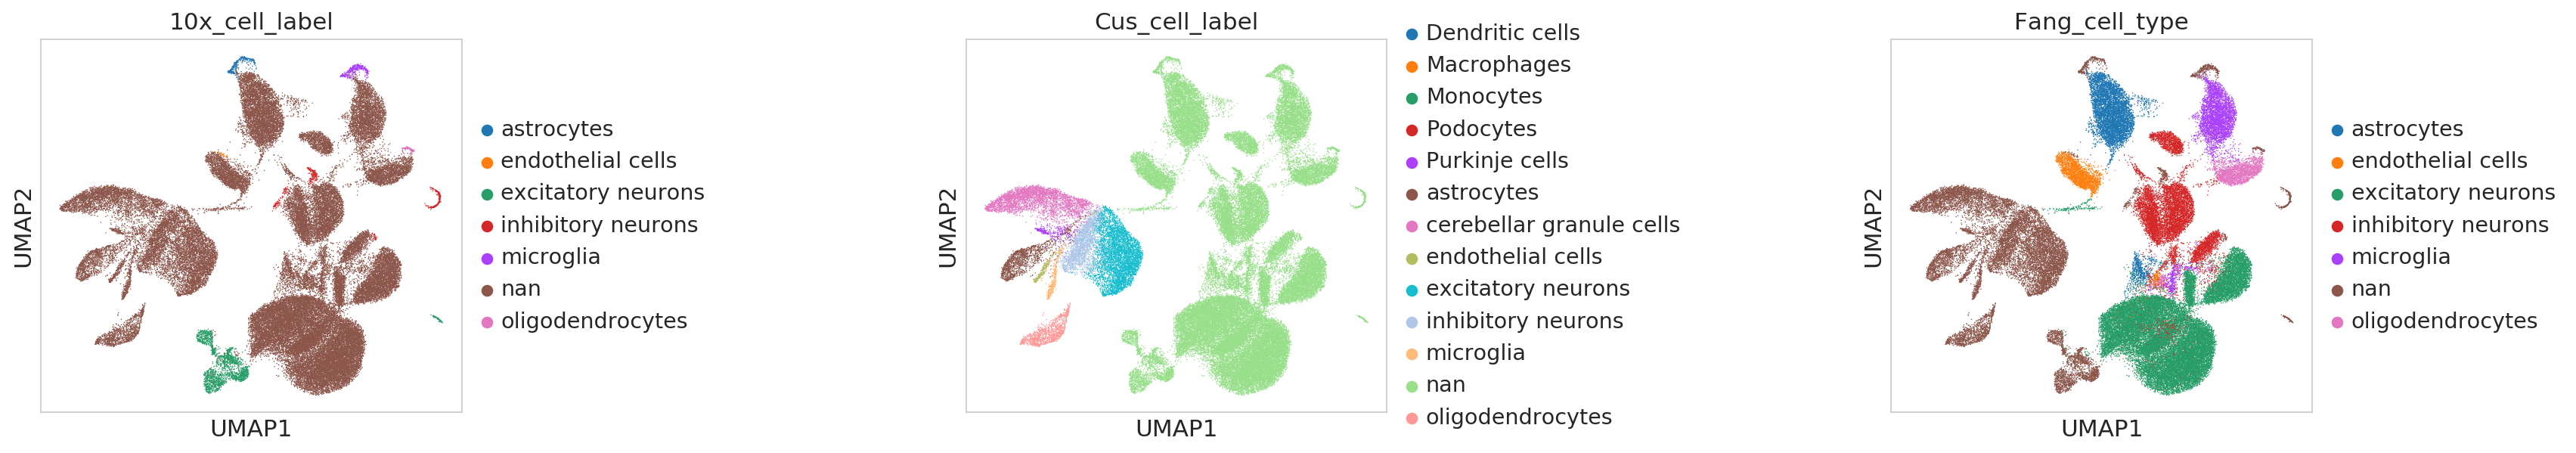

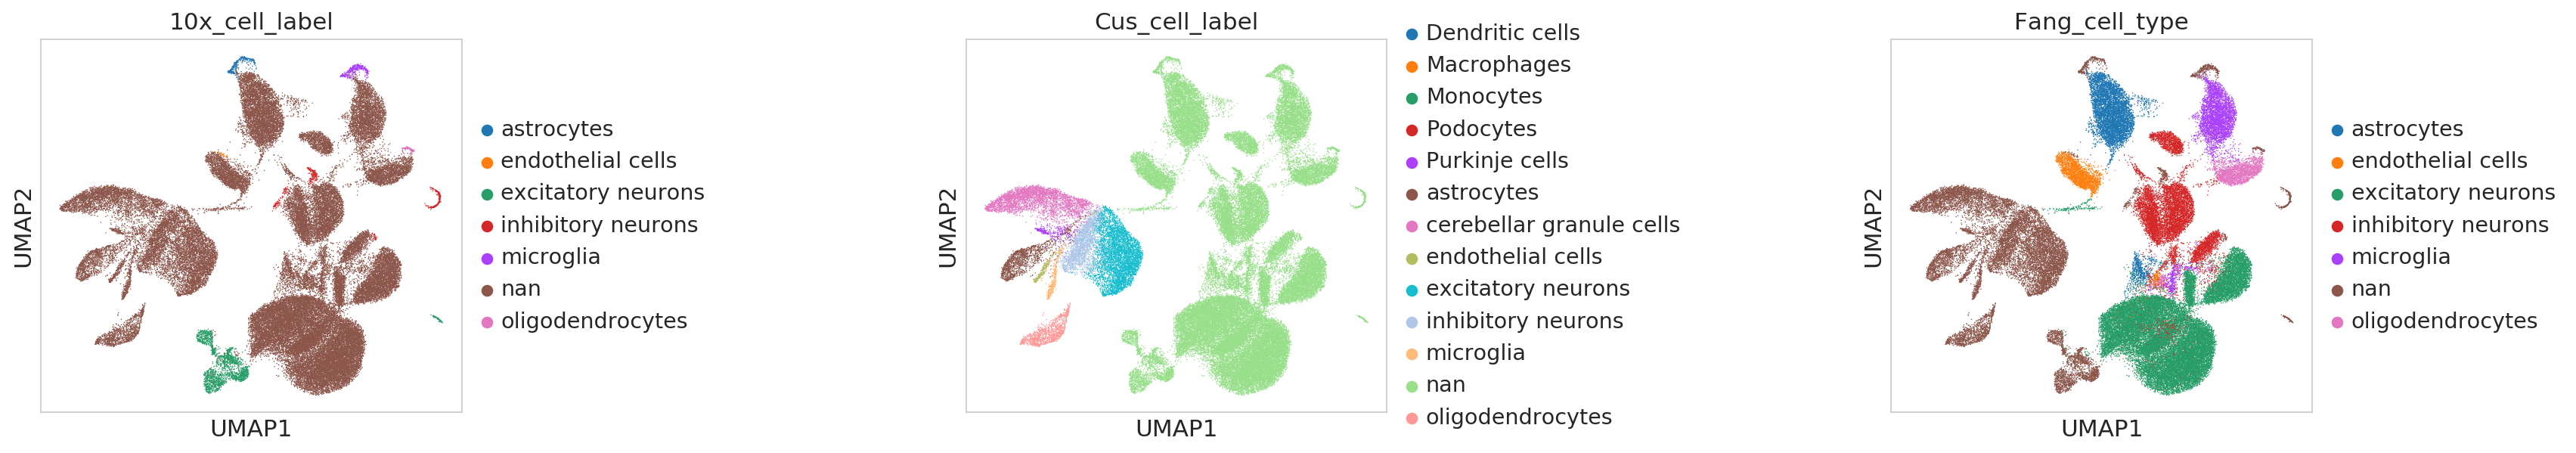

In [68]:
sc.pl.umap(adata_merged,
           color=['10x_cell_label', 'Cus_cell_label', 'Fang_cell_type'],
          wspace=1)

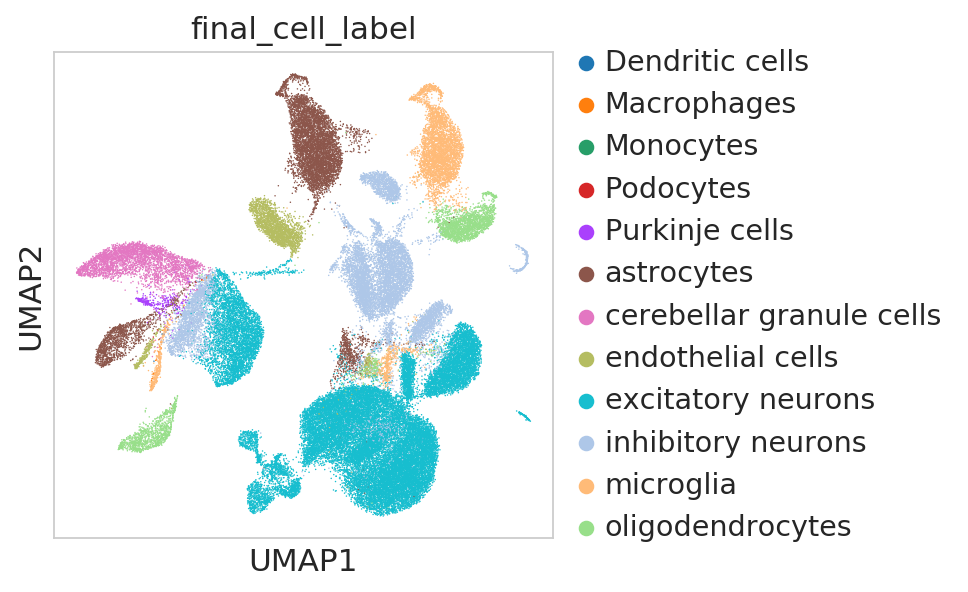

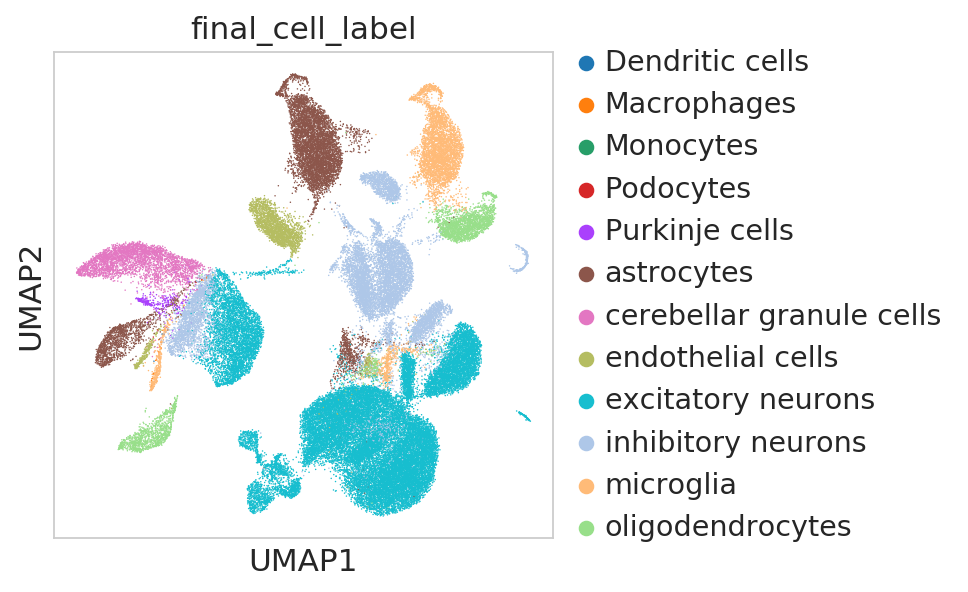

In [69]:
sc.pl.umap(adata_merged, color=['final_cell_label'])

## Cell compostion per dataset and sample

In [70]:
annot = []
annot2 = []
index = 0
for n in adata_merged.obs['tissue']:
    if (type(n)!=str) or (n=='nan'):
        annot.append(adata_merged.obs['batchname_Fang'][index])
    else:
        annot.append(n)
    index += 1
index = 0
for n in annot:
    if (type(n)!=str) or (n=='nan'):
        annot2.append(adata_merged.obs['batchname'][index])
    else:
        annot2.append(annot[index])
    index += 1
set(annot2)

adata_merged.obs['all_sample_names'] = annot2

In [71]:
contingency_table_prefilt = pd.crosstab(adata_merged.obs['all_sample_names'],
                                        adata_merged.obs['batchname'],
                                        margins = True)
contingency_table_prefilt

batchname,10x Genomics,Cusanovich et al. 2018,Fang et al. 2019,All
all_sample_names,,,,
10x Genomics,3406,0,0,3406
CEMBA180226_1A,0,0,8905,8905
CEMBA180227_1A,0,0,7546,7546
CEMBA180305_2B,0,0,7823,7823
CEMBA180306_2B,0,0,9302,9302
CEMBA180308_3B,0,0,8761,8761
CEMBA180312_3B,0,0,8403,8403
Cerebellum_62216,0,1650,0,1650
PreFrontalCortex_62216,0,4936,0,4936


batchname,10x Genomics,Cusanovich et al. 2018,Fang et al. 2019,All
all_sample_names,,,,
10x Genomics,3406,0,0,3406
CEMBA180226_1A,0,0,8905,8905
CEMBA180227_1A,0,0,7546,7546
CEMBA180305_2B,0,0,7823,7823
CEMBA180306_2B,0,0,9302,9302
CEMBA180308_3B,0,0,8761,8761
CEMBA180312_3B,0,0,8403,8403
Cerebellum_62216,0,1650,0,1650
PreFrontalCortex_62216,0,4936,0,4936


In [72]:
adata_merged.write('Large_10x_Fang_Cus_150000_normalised_cell_label.h5ad')

... storing 'all_sample_names' as categorical
... storing 'all_sample_names' as categorical


In [2]:
adata_merged =ad.read('Large_10x_Fang_Cus_150000_normalised_cell_label.h5ad')

In [3]:
adata_merged.raw.X.shape

AttributeError: 'NoneType' object has no attribute 'X'